## Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random

# Data preprocessing

In [3]:
# File paths for datasets
train_file_path = "Train.csv"
test_file_path = "Test.csv"

# Load datasets
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


### Remove unused columns

In [5]:
# Drop 'ID' column
train_df.drop(columns=['ID'], inplace=True)
test_df.drop(columns=['ID'], inplace=True)

### Encodeng

In [6]:
# Identify categorical and numerical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_df.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols.remove('Segmentation')

In [7]:
categorical_cols

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

In [8]:
numerical_cols

['Age', 'Work_Experience', 'Family_Size']

In [9]:
# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

In [10]:
train_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,D
1,0,1,38,1,2,NaN,0,3.0,3,A
2,0,1,67,1,2,1.0,2,1.0,5,B
3,1,1,67,1,7,0.0,1,2.0,5,B
4,0,1,40,1,3,NaN,1,6.0,5,A
...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,9,0.0,2,7.0,0,D
8064,1,0,35,0,4,3.0,2,4.0,3,D
8065,0,0,33,1,5,1.0,2,1.0,5,D
8066,0,0,27,1,5,1.0,2,4.0,5,B


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int32  
 1   Ever_Married     8068 non-null   int32  
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   int32  
 4   Profession       8068 non-null   int32  
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   int32  
 7   Family_Size      7733 non-null   float64
 8   Var_1            8068 non-null   int32  
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int32(6), int64(1), object(1)
memory usage: 441.3+ KB


### Replace missing values

In [12]:
# Impute missing values in numerical columns with KNN
knn_imputer = KNNImputer(n_neighbors=5)
train_df[numerical_cols] = knn_imputer.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = knn_imputer.transform(test_df[numerical_cols])

# Impute missing values in categorical columns with most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_df[categorical_cols] = categorical_imputer.fit_transform(train_df[categorical_cols])
test_df[categorical_cols] = categorical_imputer.transform(test_df[categorical_cols])

In [13]:
train_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22.0,0,5,1.0,2,4.0,3,D
1,0,1,38.0,1,2,4.4,0,3.0,3,A
2,0,1,67.0,1,2,1.0,2,1.0,5,B
3,1,1,67.0,1,7,0.0,1,2.0,5,B
4,0,1,40.0,1,3,7.4,1,6.0,5,A
...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22.0,0,9,0.0,2,7.0,0,D
8064,1,0,35.0,0,4,3.0,2,4.0,3,D
8065,0,0,33.0,1,5,1.0,2,1.0,5,D
8066,0,0,27.0,1,5,1.0,2,4.0,5,B


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int32  
 1   Ever_Married     8068 non-null   int32  
 2   Age              8068 non-null   float64
 3   Graduated        8068 non-null   int32  
 4   Profession       8068 non-null   int32  
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   int32  
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   int32  
 9   Segmentation     8068 non-null   object 
dtypes: float64(3), int32(6), object(1)
memory usage: 441.3+ KB


### Scale numerical features

In [15]:
scaler = MinMaxScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

In [16]:
train_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,0.056338,0,5,0.071429,2,0.375,3,D
1,0,1,0.281690,1,2,0.314286,0,0.250,3,A
2,0,1,0.690141,1,2,0.071429,2,0.000,5,B
3,1,1,0.690141,1,7,0.000000,1,0.125,5,B
4,0,1,0.309859,1,3,0.528571,1,0.625,5,A
...,...,...,...,...,...,...,...,...,...,...
8063,1,0,0.056338,0,9,0.000000,2,0.750,0,D
8064,1,0,0.239437,0,4,0.214286,2,0.375,3,D
8065,0,0,0.211268,1,5,0.071429,2,0.000,5,D
8066,0,0,0.126761,1,5,0.071429,2,0.375,5,B


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int32  
 1   Ever_Married     8068 non-null   int32  
 2   Age              8068 non-null   float64
 3   Graduated        8068 non-null   int32  
 4   Profession       8068 non-null   int32  
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   int32  
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   int32  
 9   Segmentation     8068 non-null   object 
dtypes: float64(3), int32(6), object(1)
memory usage: 441.3+ KB


### Remove Outlier

In [18]:
# Remove outliers with LOF
lof = LocalOutlierFactor(n_neighbors=30, contamination=0.05)
outlier_flags = lof.fit_predict(train_df[numerical_cols])
train_df = train_df[outlier_flags == 1]

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7664 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           7664 non-null   int32  
 1   Ever_Married     7664 non-null   int32  
 2   Age              7664 non-null   float64
 3   Graduated        7664 non-null   int32  
 4   Profession       7664 non-null   int32  
 5   Work_Experience  7664 non-null   float64
 6   Spending_Score   7664 non-null   int32  
 7   Family_Size      7664 non-null   float64
 8   Var_1            7664 non-null   int32  
 9   Segmentation     7664 non-null   object 
dtypes: float64(3), int32(6), object(1)
memory usage: 479.0+ KB


#### Split features and target

In [20]:
# Split features and target
x_train = train_df.drop(columns=['Segmentation'])
y_train = train_df['Segmentation']
x_test = test_df.drop(columns=['Segmentation'])
y_test = test_df['Segmentation']

# Number of features
num_features = x_train.shape[1]

# Genetic Algorithm

#### Components of Genetic Algorithm
* binary chromosomes
* Create population

In [21]:
# Create initial population of binary chromosomes
def create_population(size, num_features):
    np.random.seed(10)
    return [np.random.randint(0, 2, num_features).tolist() for _ in range(size)]

### Fitness function

In [22]:
# Fitness function with optional penalty for feature count deviation
def fitness_function(chromosome, target_num_features=None):
    selected_features = [i for i in range(num_features) if chromosome[i] == 1]
    if len(selected_features) == 0:
        return 0
    X_train_sel = x_train.iloc[:, selected_features]
    X_test_sel = x_test.iloc[:, selected_features]
    model = DecisionTreeClassifier()
    model.fit(X_train_sel, y_train)
    predictions = model.predict(X_test_sel)
    accuracy = accuracy_score(y_test, predictions)
    if target_num_features:
        penalty = abs(len(selected_features) - target_num_features) * 0.05
        return accuracy - penalty
    return accuracy


### Selection Method

In [23]:
# Tournament selection method
def tournament_selection(population, scores, k=3):
    selected = random.choices(list(zip(population, scores)), k=k)
    return max(selected, key=lambda x: x[1])[0]

# Roulette wheel selection method
def roulette_wheel_selection(population, scores):
    total_fitness = sum(scores)
    if total_fitness == 0:
        return random.choice(population)
    pick = random.uniform(0, total_fitness)
    current = 0
    for chromosome, score in zip(population, scores):
        current += score
        if current > pick:
            return chromosome
    return population[-1]


### Crossover Mechanism

In [24]:
# Multi-point crossover between two parents
def multi_point_crossover(parent1, parent2, num_points=2):
    points = sorted(random.sample(range(1, num_features - 1), min(num_points, num_features - 2)))
    child1, child2 = parent1[:], parent2[:]
    for i in range(len(points)):
        if i % 2 == 0:
            child1[points[i]:] = parent2[points[i]:]
            child2[points[i]:] = parent1[points[i]:]
    return child1, child2


# Uniform crossover between two parents
def uniform_crossover(parent1, parent2):
    child1, child2 = parent1[:], parent2[:]
    for i in range(len(parent1)):
        if random.random() < 0.5:
            child1[i], child2[i] = child2[i], child1[i]
    return child1, child2


### Mutation

In [25]:
# Mutation of a chromosome based on mutation rate
def mutate(chromosome, mutation_rate=0.1):
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

### Genetic algorithm implementation

In [26]:
# Main genetic algorithm function
def genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, selection_method='tournament',
                      crossover_method='multi_point', target_num_features=None, convergence_threshold=0.001):
    population = create_population(pop_size, num_features)
    best_score_prev = -1
    for generation in range(generations):
        scores = [fitness_function(ch, target_num_features) for ch in population]
        best_score = max(scores)
        if abs(best_score - best_score_prev) < convergence_threshold:
            print(f"Converged at generation {generation}")
            break
        best_score_prev = best_score
        new_population = []
        for _ in range(pop_size // 2):
            if selection_method == 'tournament':
                parent1 = tournament_selection(population, scores)
                parent2 = tournament_selection(population, scores)
            elif selection_method == 'roulette':
                parent1 = roulette_wheel_selection(population, scores)
                parent2 = roulette_wheel_selection(population, scores)
            if crossover_method == 'multi_point':
                child1, child2 = multi_point_crossover(parent1, parent2)
            elif crossover_method == 'uniform':
                child1, child2 = uniform_crossover(parent1, parent2)
            new_population.extend([mutate(child1, mutation_rate), mutate(child2, mutation_rate)])
        population = new_population
        if generation == generations:
            print(f"Reach maximum generation size")
    best_chromosome = max(population, key=lambda x: fitness_function(x, target_num_features))
    return [i for i in range(num_features) if best_chromosome[i] == 1]


## Feature Selection

In [27]:
# Select 3 features with different selection and crossover methods
selected_3_tournament_mp = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=3,
                                             selection_method='tournament', crossover_method='multi_point',
                                             convergence_threshold=0.0001)
selected_3_roulette_uni = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=3,
                                            selection_method='roulette', crossover_method='uniform',
                                            convergence_threshold=0.0001)
selected_3_tournament_uni = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=3,
                                              selection_method='tournament', crossover_method='uniform',
                                              convergence_threshold=0.0001)
selected_3_roulette_mp = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=3,
                                           selection_method='roulette', crossover_method='multi_point',
                                           convergence_threshold=0.0001)

# Select 5 features with different selection and crossover methods
selected_5_tournament_mp = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=5,
                                             selection_method='tournament', crossover_method='multi_point',
                                             convergence_threshold=0.0001)
selected_5_roulette_uni = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=5,
                                            selection_method='roulette', crossover_method='uniform',
                                            convergence_threshold=0.0001)
selected_5_tournament_uni = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=5,
                                              selection_method='tournament', crossover_method='uniform',
                                              convergence_threshold=0.0001)
selected_5_roulette_mp = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=5,
                                           selection_method='roulette', crossover_method='multi_point',
                                           convergence_threshold=0.0001)

# Select 8 features with different selection and crossover methods
selected_8_tournament_mp = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=8,
                                             selection_method='tournament', crossover_method='multi_point',
                                             convergence_threshold=0.0001)
selected_8_roulette_uni = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=8,
                                            selection_method='roulette', crossover_method='uniform',
                                            convergence_threshold=0.0001)
selected_8_tournament_uni = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=8,
                                              selection_method='tournament', crossover_method='uniform',
                                              convergence_threshold=0.0001)
selected_8_roulette_mp = genetic_algorithm(pop_size=20, generations=30, mutation_rate=0.1, target_num_features=8,
                                           selection_method='roulette', crossover_method='multi_point',
                                           convergence_threshold=0.0001)

Converged at generation 6
Converged at generation 8
Converged at generation 5
Converged at generation 7
Converged at generation 9
Converged at generation 28
Converged at generation 4
Converged at generation 9
Converged at generation 14
Converged at generation 4


## Plot Feature Distribution

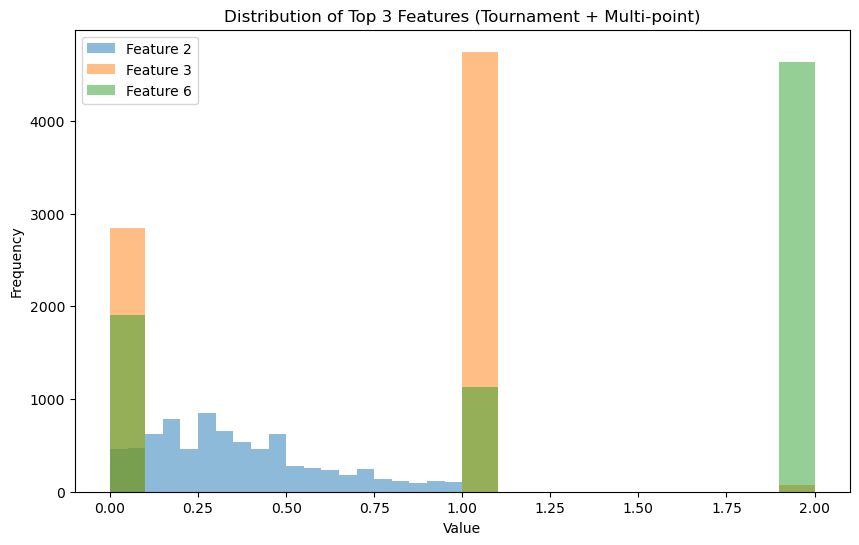

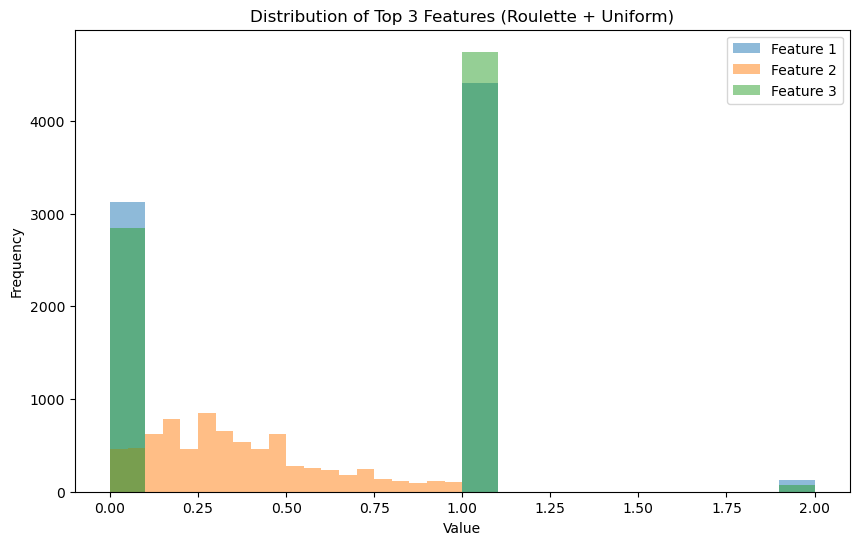

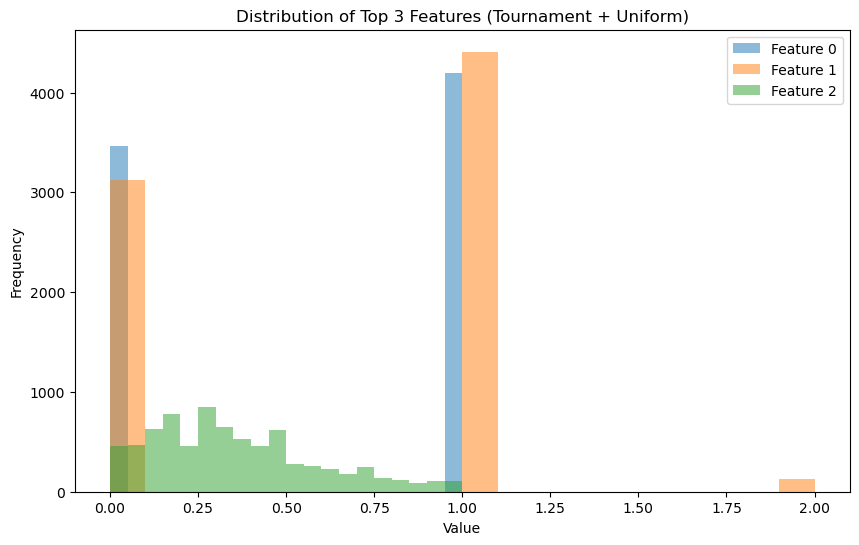

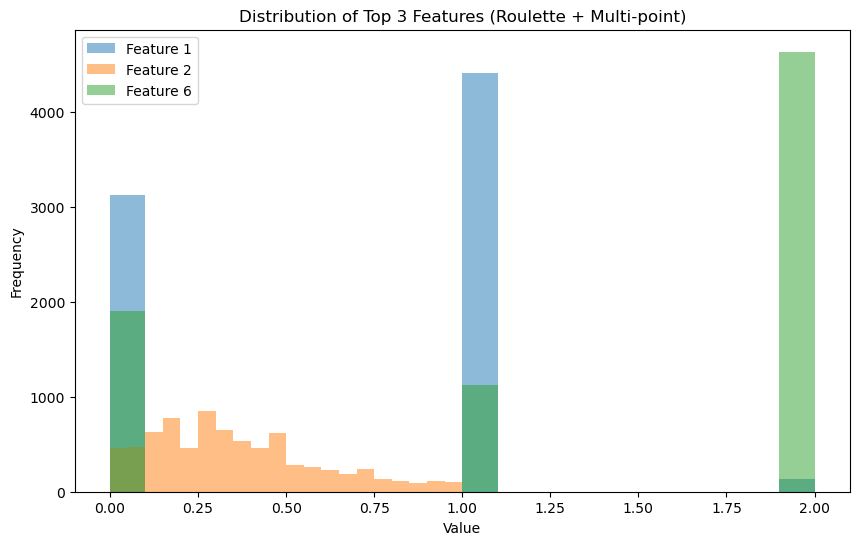

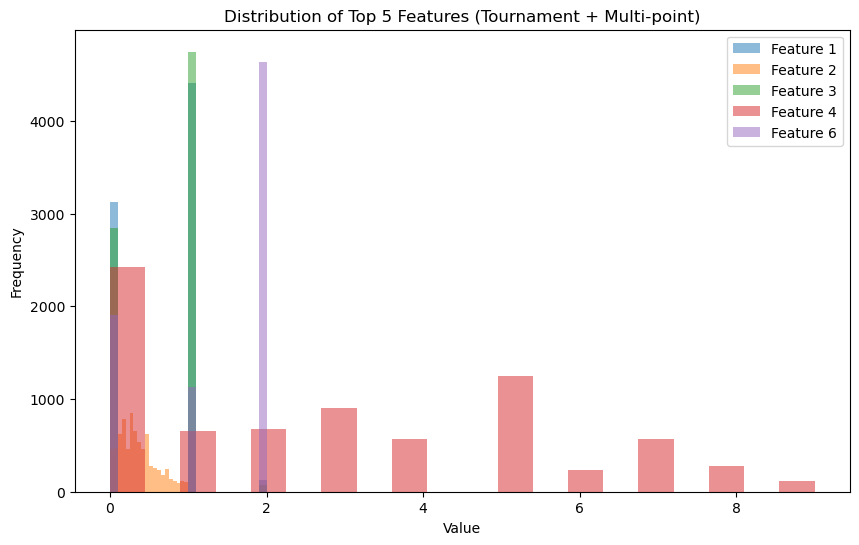

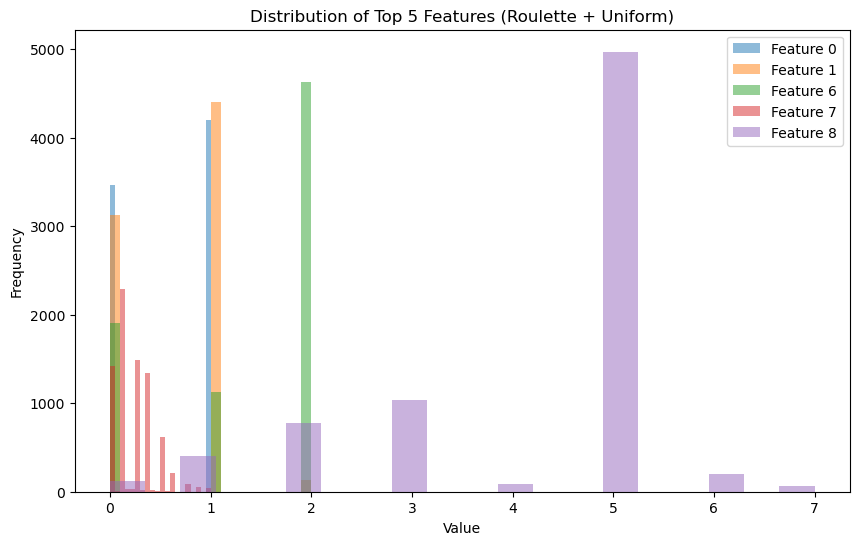

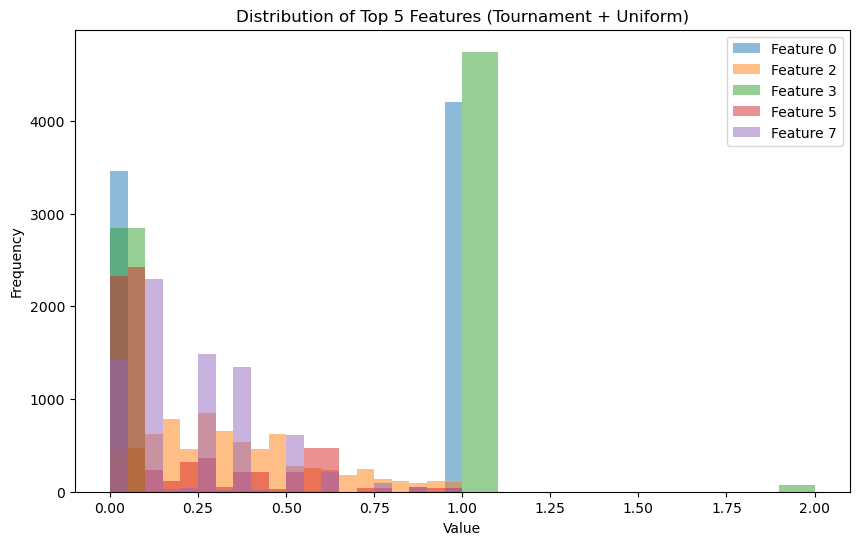

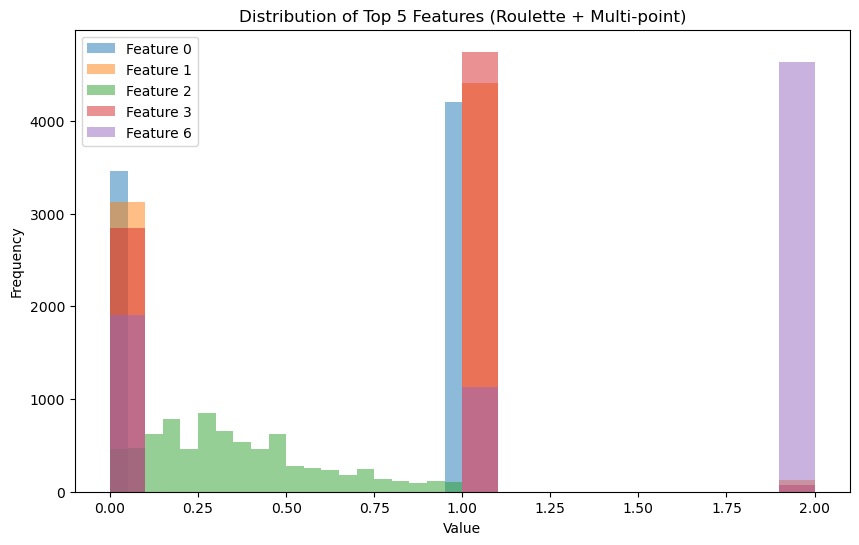

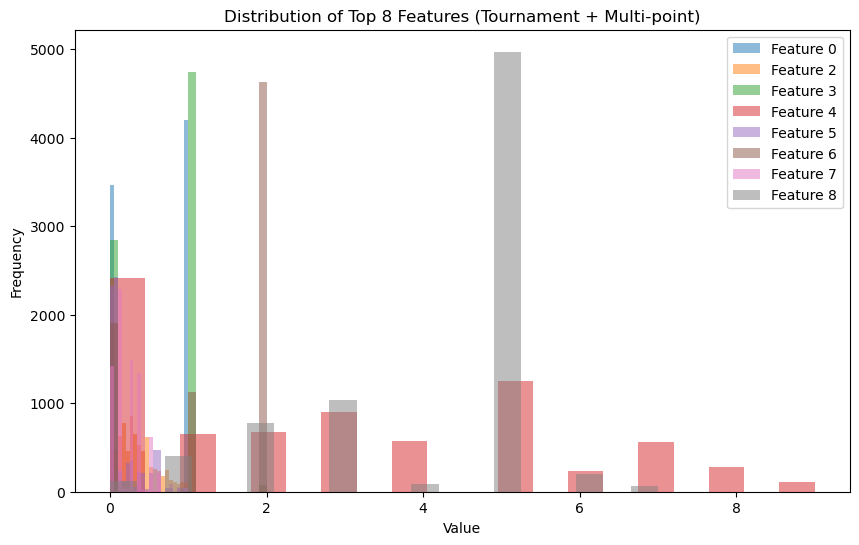

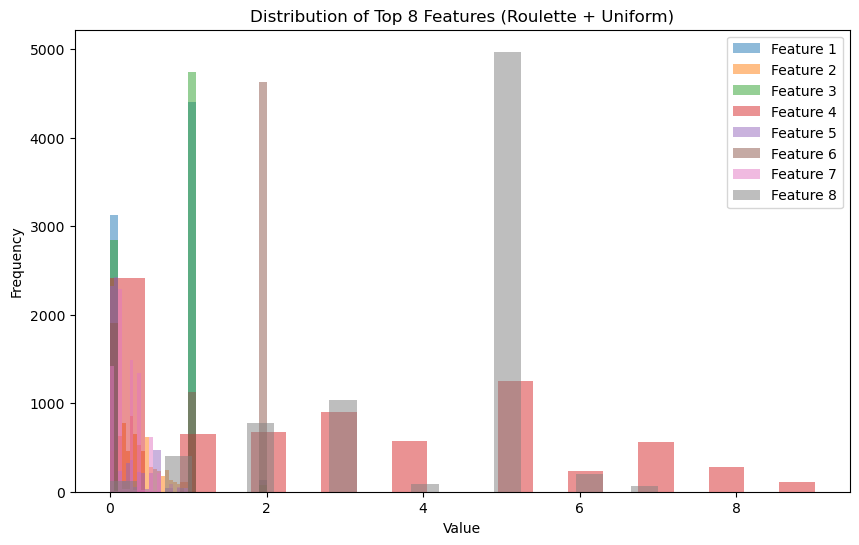

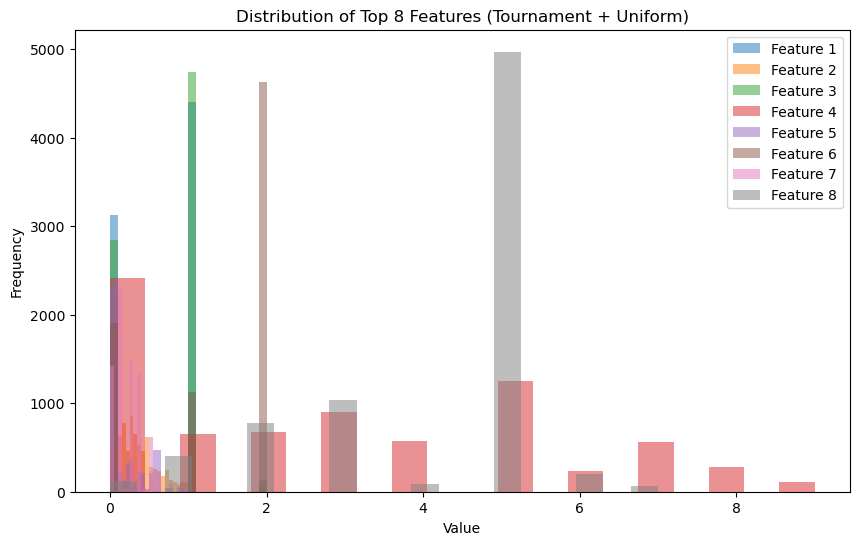

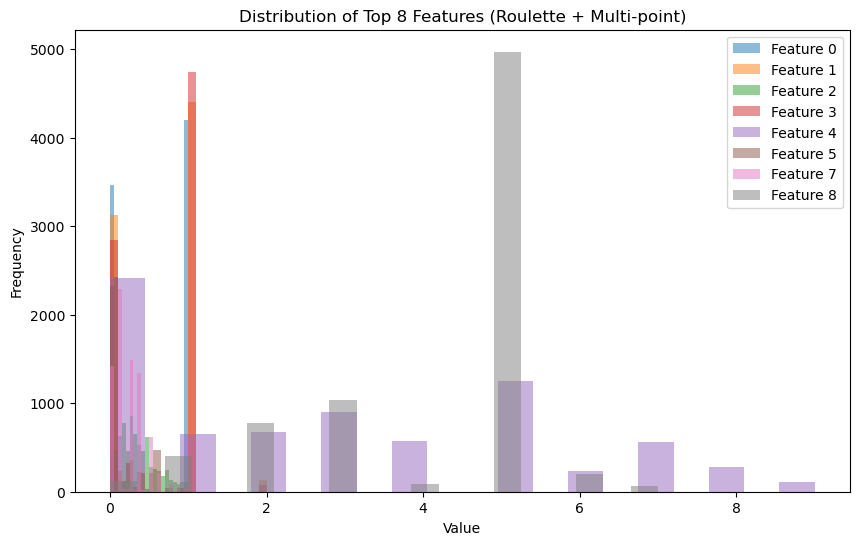

In [28]:
# Function to plot the distribution of selected features
def plot_feature_distribution(df, selected_features, title):
    plt.figure(figsize=(10, 6))
    for i in selected_features:
        plt.hist(df.iloc[:, i], bins=20, alpha=0.5, label=f'Feature {i}')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


# Plot distribution for 3 features with all combinations
plot_feature_distribution(x_train, selected_3_tournament_mp,
                          "Distribution of Top 3 Features (Tournament + Multi-point)")
plot_feature_distribution(x_train, selected_3_roulette_uni, "Distribution of Top 3 Features (Roulette + Uniform)")
plot_feature_distribution(x_train, selected_3_tournament_uni, "Distribution of Top 3 Features (Tournament + Uniform)")
plot_feature_distribution(x_train, selected_3_roulette_mp, "Distribution of Top 3 Features (Roulette + Multi-point)")

# Plot distribution for 5 features with all combinations
plot_feature_distribution(x_train, selected_5_tournament_mp,
                          "Distribution of Top 5 Features (Tournament + Multi-point)")
plot_feature_distribution(x_train, selected_5_roulette_uni, "Distribution of Top 5 Features (Roulette + Uniform)")
plot_feature_distribution(x_train, selected_5_tournament_uni, "Distribution of Top 5 Features (Tournament + Uniform)")
plot_feature_distribution(x_train, selected_5_roulette_mp, "Distribution of Top 5 Features (Roulette + Multi-point)")

# Plot distribution for 8 features with all combinations
plot_feature_distribution(x_train, selected_8_tournament_mp,
                          "Distribution of Top 8 Features (Tournament + Multi-point)")
plot_feature_distribution(x_train, selected_8_roulette_uni, "Distribution of Top 8 Features (Roulette + Uniform)")
plot_feature_distribution(x_train, selected_8_tournament_uni, "Distribution of Top 8 Features (Tournament + Uniform)")
plot_feature_distribution(x_train, selected_8_roulette_mp, "Distribution of Top 8 Features (Roulette + Multi-point)")


## Model Evaluation

In [29]:
# Function to evaluate model accuracy using selected features
def evaluate_model(selected_features):
    X_train_sel = x_train.iloc[:, selected_features]
    X_test_sel = x_test.iloc[:, selected_features]
    model = DecisionTreeClassifier()
    model.fit(X_train_sel, y_train)
    predictions = model.predict(X_test_sel)
    return accuracy_score(y_test, predictions)

In [30]:
# Calculate accuracy for 3 features with all combinations
accuracy_3_tournament_mp = evaluate_model(selected_3_tournament_mp)
accuracy_3_roulette_uni = evaluate_model(selected_3_roulette_uni)
accuracy_3_tournament_uni = evaluate_model(selected_3_tournament_uni)
accuracy_3_roulette_mp = evaluate_model(selected_3_roulette_mp)

# Calculate accuracy for 5 features with all combinations
accuracy_5_tournament_mp = evaluate_model(selected_5_tournament_mp)
accuracy_5_roulette_uni = evaluate_model(selected_5_roulette_uni)
accuracy_5_tournament_uni = evaluate_model(selected_5_tournament_uni)
accuracy_5_roulette_mp = evaluate_model(selected_5_roulette_mp)

# Calculate accuracy for 8 features with all combinations
accuracy_8_tournament_mp = evaluate_model(selected_8_tournament_mp)
accuracy_8_roulette_uni = evaluate_model(selected_8_roulette_uni)
accuracy_8_tournament_uni = evaluate_model(selected_8_tournament_uni)
accuracy_8_roulette_mp = evaluate_model(selected_8_roulette_mp)

# Calculate accuracy with all features
num_features = x_train.shape[1]  # Total number of features
accuracy_all = evaluate_model(list(range(num_features)))

In [31]:
# Display results
print("Results for 3 features:")
print(f"Accuracy with Tournament + Multi-point: {accuracy_3_tournament_mp:.4f}")
print(f"Accuracy with Roulette + Uniform: {accuracy_3_roulette_uni:.4f}")
print(f"Accuracy with Tournament + Uniform: {accuracy_3_tournament_uni:.4f}")
print(f"Accuracy with Roulette + Multi-point: {accuracy_3_roulette_mp:.4f}")

print("\nResults for 5 features:")
print(f"Accuracy with Tournament + Multi-point: {accuracy_5_tournament_mp:.4f}")
print(f"Accuracy with Roulette + Uniform: {accuracy_5_roulette_uni:.4f}")
print(f"Accuracy with Tournament + Uniform: {accuracy_5_tournament_uni:.4f}")
print(f"Accuracy with Roulette + Multi-point: {accuracy_5_roulette_mp:.4f}")

print("\nResults for 8 features:")
print(f"Accuracy with Tournament + Multi-point: {accuracy_8_tournament_mp:.4f}")
print(f"Accuracy with Roulette + Uniform: {accuracy_8_roulette_uni:.4f}")
print(f"Accuracy with Tournament + Uniform: {accuracy_8_tournament_uni:.4f}")
print(f"Accuracy with Roulette + Multi-point: {accuracy_8_roulette_mp:.4f}")

print(f"\nAccuracy with all features: {accuracy_all:.4f}")


Results for 3 features:
Accuracy with Tournament + Multi-point: 0.3418
Accuracy with Roulette + Uniform: 0.3357
Accuracy with Tournament + Uniform: 0.3559
Accuracy with Roulette + Multi-point: 0.3342

Results for 5 features:
Accuracy with Tournament + Multi-point: 0.3285
Accuracy with Roulette + Uniform: 0.3129
Accuracy with Tournament + Uniform: 0.3278
Accuracy with Roulette + Multi-point: 0.3456

Results for 8 features:
Accuracy with Tournament + Multi-point: 0.3137
Accuracy with Roulette + Uniform: 0.3236
Accuracy with Tournament + Uniform: 0.3247
Accuracy with Roulette + Multi-point: 0.3076

Accuracy with all features: 0.3140


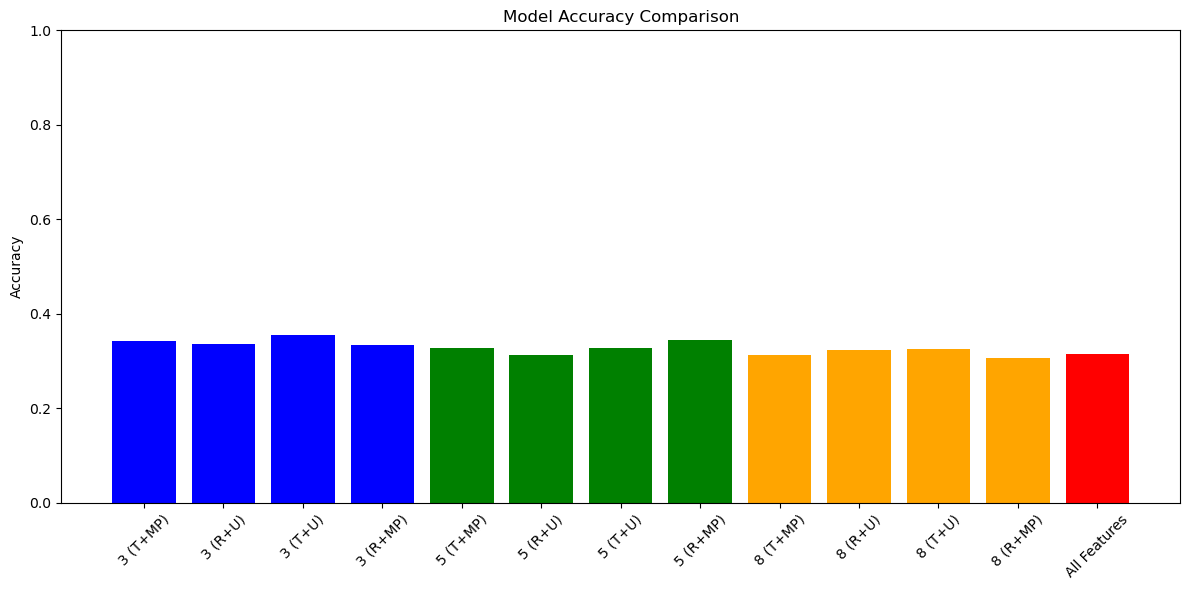

In [32]:
# Plot comparison chart
accuracies = [
    accuracy_3_tournament_mp, accuracy_3_roulette_uni, accuracy_3_tournament_uni, accuracy_3_roulette_mp,
    accuracy_5_tournament_mp, accuracy_5_roulette_uni, accuracy_5_tournament_uni, accuracy_5_roulette_mp,
    accuracy_8_tournament_mp, accuracy_8_roulette_uni, accuracy_8_tournament_uni, accuracy_8_roulette_mp,
    accuracy_all
]
labels = [
    '3 (T+MP)', '3 (R+U)', '3 (T+U)', '3 (R+MP)',
    '5 (T+MP)', '5 (R+U)', '5 (T+U)', '5 (R+MP)',
    '8 (T+MP)', '8 (R+U)', '8 (T+U)', '8 (R+MP)',
    'All Features'
]
plt.figure(figsize=(12, 6))
plt.bar(labels, accuracies, color=['blue'] * 4 + ['green'] * 4 + ['orange'] * 4 + ['red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()